In [6]:
import pandas as pd

import matplotlib.pyplot as plt

import numpy as np

from sklearn.linear_model import Ridge

from sklearn.model_selection import train_test_split

from sklearn.metrics import r2_score

In [7]:
 #Import data and split

df = pd.read_csv("ridgereg_data.csv")

x = df[['x']]

y = df[['y']]

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2,random_state=5)


In [8]:
X_train2 = np.array(X_train).reshape(-1,1)

X_test2 = np.array(X_test).reshape(-1,1)


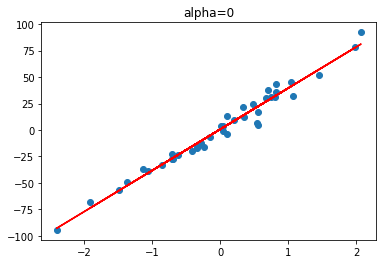

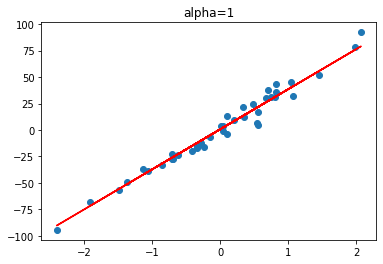

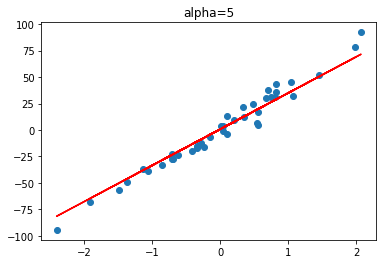

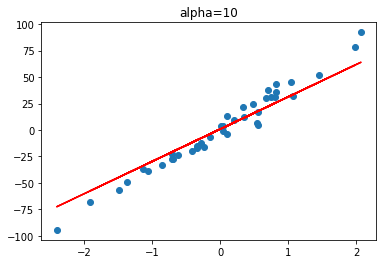

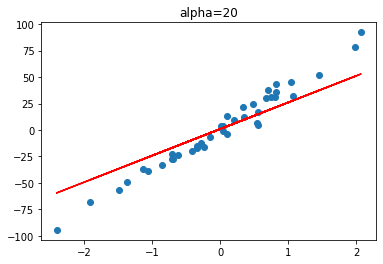

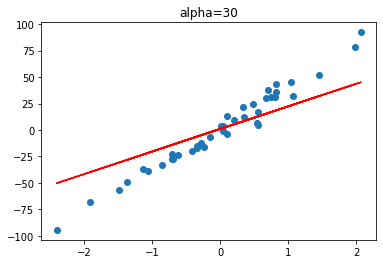

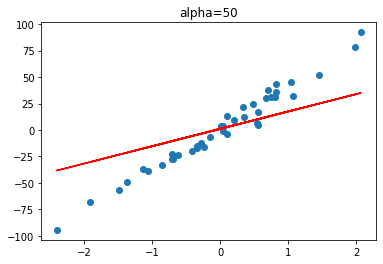

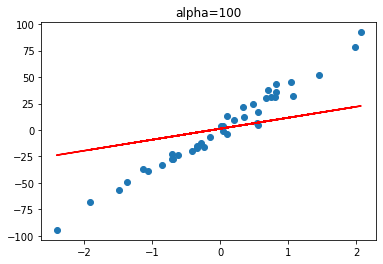

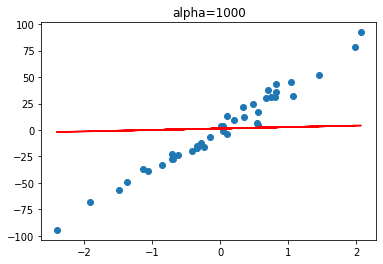

In [9]:
# Let us explore how alpha effects the linear regression line

for alp in [0,1,5,10,20,30,50,100,1000]:

    rr = Ridge(alpha=alp)

    rr.fit(X_train2, y_train)

    plt.scatter(X_train2,y_train)

    plt.plot(X_train2,rr.predict(X_train2),color="red")

    plt.title("alpha="+str(alp))

    plt.show()

In [10]:
# Grid search for best alpha

alphas = np.linspace(0,4,50) # past 4 the score decreases

r2values = []

for alp in alphas:

    rr = Ridge(alpha=alp)

    rr.fit(X_train2, y_train)

    r2_test = r2_score(y_test, rr.predict(X_test2))

    r2values.append(r2_test)



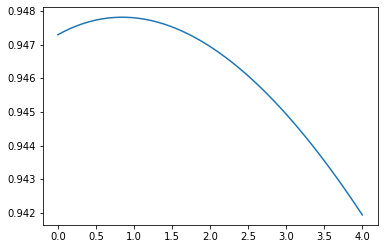

In [11]:
#plot r2 values against alpha

plt.plot(alphas,r2values)

plt.show()

# Lasso Regression

In [12]:
from sklearn.linear_model import Lasso

df = pd.read_csv('diamonds.csv')

df

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...,...
53935,53936,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,53937,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,53938,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,53939,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


In [13]:
#Pick variables and split

X = df[['carat', 'depth', 'table', 'x', 'y', 'z']] # input variables

y = df[['price']] # target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25,random_state=101)



In [14]:
# Find "optimal" alpha using grid search

alphas = [0.1,0.2,0.3,0.4,0.5,1,2,3,4,5,6,7,8]

scores = []

for alp in alphas:

    lasso = Lasso(alpha=alp)

    lasso.fit(X_train, y_train)

    print(lasso.coef_.round(2))

    sc = lasso.score(X_test, y_test)

    scores.append(sc)

    print("alpha=",alp," lasso score:", sc)

[10561.29  -198.53  -100.89 -1481.66   272.52    58.67]
alpha= 0.1  lasso score: 0.8615203383830394
[10548.86  -196.14  -100.91 -1449.32   267.66    22.32]
alpha= 0.2  lasso score: 0.8615682320291203
[10535.48  -194.56  -100.92 -1423.18   260.75     0.  ]
alpha= 0.3  lasso score: 0.8616132009047861
[10522.45  -194.3   -100.91 -1408.7    251.64     0.  ]
alpha= 0.4  lasso score: 0.8616633895642146
[10509.76  -194.04  -100.9  -1394.57   242.75     0.  ]
alpha= 0.5  lasso score: 0.8617102478677708
[10444.78  -192.71  -100.84 -1323.39   198.33    -0.  ]
alpha= 1  lasso score: 0.861910447248714
[10313.86  -190.04  -100.73 -1180.73   109.61    -0.  ]
alpha= 2  lasso score: 0.8621457045236209
[10181.42  -187.31  -100.6  -1043.92    27.31    -0.  ]
alpha= 3  lasso score: 0.862157268211359
[10043.78  -184.25  -100.23  -959.4      0.      -0.  ]
alpha= 4  lasso score: 0.8620124327806014
[9906.94 -181.09  -99.75 -902.34    0.     -0.  ]
alpha= 5  lasso score: 0.8618377466753648
[9769.61 -177.93  

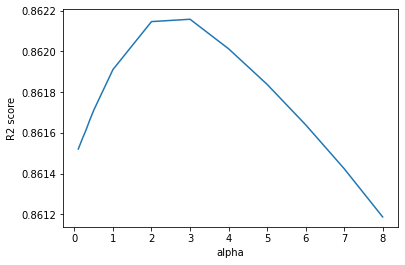

In [15]:
#plot scores against alpha

plt.plot(alphas, scores)

plt.xlabel("alpha")

plt.ylabel("R2 score")

plt.show()


In [29]:

import pandas as pd

import numpy as np

import matplotlib.pyplot as plt

import seaborn as sns



from sklearn.linear_model import LogisticRegression

from sklearn import metrics

from sklearn.model_selection import train_test_split

# Logistical regression

In [30]:
df = pd.read_csv("exams.csv",skiprows=0,delimiter=",")

df

,exam1,exam2,admit
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1
...,...,...,...
95,83.489163,48.380286,1
96,42.261701,87.103851,1
97,99.315009,68.775409,1
98,55.340018,64.931938,1


In [31]:
#Pick variables

X = df.iloc[:, 0:2]

y = df.iloc[:, -1]# last column 



In [32]:
#filter rows

admit_yes = df.loc[y == 1]

admit_no = df.loc[y == 0]

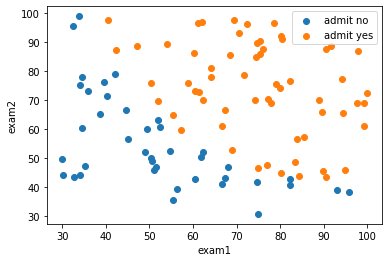

In [33]:
#plot both classes

plt.scatter(admit_no.iloc[:,0],admit_no.iloc[:,1],label="admit no")

plt.scatter(admit_yes.iloc[:,0],admit_yes.iloc[:,1],label="admit yes")

plt.xlabel("exam1")

plt.ylabel("exam2")

plt.legend()

plt.show()

In [34]:
#Split data and train model

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,random_state=0)#25% to testing, 75% to training

model = LogisticRegression()

model.fit(X_train, y_train)

LogisticRegression()

In [35]:
#Predict and evaluate

y_pred = model.predict(X_test)

cnf_matrix = metrics.confusion_matrix(y_test, y_pred)#HOX! y_test and y_pred here

cnf_matrix


array([[11,  0],
       [ 4, 10]], dtype=int64)

C:\Users\hocineg\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


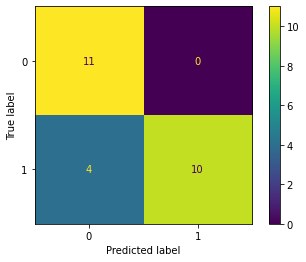

In [36]:
metrics.plot_confusion_matrix(model, X_test, y_test)#HOX! Model and X_test here instead y_pred!!!!

plt.show()

In [37]:
#Metrics

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

print("Precision:",metrics.precision_score(y_test, y_pred))

print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy: 0.84
Precision: 1.0
Recall: 0.7142857142857143


In [39]:
#Plot predicted labels

y_test2 = y_test.to_numpy()

idx1 = np.logical_and(y_pred == 1, y_test2 == 1)

idx2 = np.logical_and(y_pred == 1, y_test2 == 0)

idx3 = np.logical_and(y_pred == 0, y_test2 == 0)

idx4 = np.logical_and(y_pred == 0, y_test2 == 1)

X1 = X_test.loc[idx1]

X2 = X_test.loc[idx2]

X3 = X_test.loc[idx3]

X4 = X_test.loc[idx4]

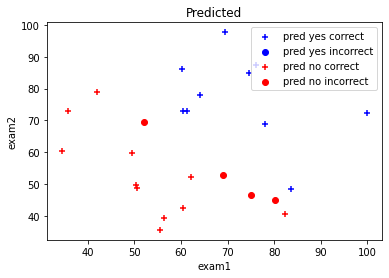

In [40]:
plt.scatter(X1.iloc[:,0],X1.iloc[:,1],label="pred yes correct",marker="+",color="blue")

plt.scatter(X2.iloc[:,0],X2.iloc[:,1],label="pred yes incorrect",marker="o",color="blue")

plt.scatter(X3.iloc[:,0],X3.iloc[:,1],label="pred no correct",marker="+",color="red")

plt.scatter(X4.iloc[:,0],X4.iloc[:,1],label="pred no incorrect",marker="o",color="red")

plt.xlabel("exam1")

plt.ylabel("exam2")

plt.legend(loc='upper right')

plt.title("Predicted")

plt.show()

In [44]:
#Predict single exam score class

exam1 = 73 # persons exam1 score

exam2 = 65 # exam2 score

data = np.array([exam1,exam2]).reshape(-1,2)

y_pred_single = model.predict(data)

y_pred_single

C:\Users\hocineg\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([1], dtype=int64)

In [45]:
import pandas as pd

import matplotlib.pyplot as plt

import numpy as np

from sklearn import metrics

from sklearn.model_selection import train_test_split

from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import classification_report, confusion_matrix

import seaborn as sb

#import data

df = pd.read_csv("iris.csv")

df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [46]:
df.Species.describe()

count             150
unique              3
top       Iris-setosa
freq               50
Name: Species, dtype: object

In [47]:
df.Species.unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [48]:
#Pick variables

X = df.iloc[:, 1:5]

y = df.iloc[:, 5]

X

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [51]:


#Split data

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20,random_state=1)


In [52]:
#Model selection, training, predicting

classifier = KNeighborsClassifier(n_neighbors=5) #k=5 here

classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

In [53]:
y_pred

array(['Iris-setosa', 'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa',
       'Iris-virginica', 'Iris-versicolor', 'Iris-virginica',
       'Iris-setosa', 'Iris-setosa', 'Iris-virginica', 'Iris-versicolor',
       'Iris-setosa', 'Iris-virginica', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-setosa', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-setosa', 'Iris-setosa', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa',
       'Iris-virginica', 'Iris-versicolor', 'Iris-setosa', 'Iris-setosa',
       'Iris-versicolor', 'Iris-virginica'], dtype=object)

C:\Users\hocineg\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


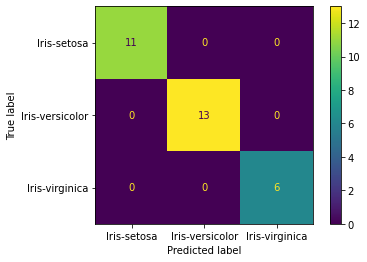

In [54]:
#Evaluate

metrics.plot_confusion_matrix(classifier, X_test, y_test)

plt.show()



In [55]:
print(classification_report(y_test, y_pred))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-versicolor       1.00      1.00      1.00        13
 Iris-virginica       1.00      1.00      1.00         6

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30



Text(0, 0.5, 'Mean Error')

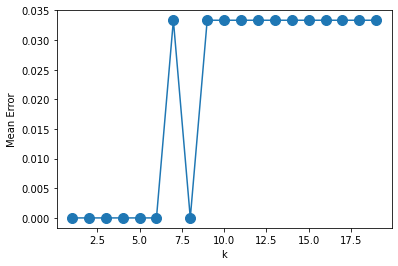

In [57]:
#Choice of k examined

error = []

for k in range(1, 20):

    knn = KNeighborsClassifier(n_neighbors=k)

    knn.fit(X_train, y_train)

    y_pred = knn.predict(X_test)

    error.append(np.mean(y_pred != y_test))

    

    

plt.plot(range(1, 20), error, marker='o', markersize=10)

plt.xlabel('k')

plt.ylabel('Mean Error')

